In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model=sequential=keras.Sequential(
     [
         layers.Conv2D(32, (3,3),activation='relu',padding='same',input_shape=(28,28,1)),
         layers.MaxPooling2D(pool_size=(2,2)),
         layers.Flatten(),
         layers.Dense(10,activation='softmax')
     ]  
)

In [7]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
#scale the images to the [0,1] range
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
#add channel dimensions to the images'
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
#split the training set into training and validation sets"
x_train,x_val=x_train[:5000],x_train[5000:]
y_train,y_val=y_train[:5000],y_train[5000:]

In [8]:
datagen=ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
)   

In [9]:
#without data augmentation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
157/157 [==============================] - 6s 36ms/step - loss: 0.7022 - accuracy: 0.8252 - val_loss: 0.3623 - val_accuracy: 0.8959
Epoch 2/5
157/157 [==============================] - 6s 40ms/step - loss: 0.2739 - accuracy: 0.9222 - val_loss: 0.2892 - val_accuracy: 0.9123
Epoch 3/5
157/157 [==============================] - 5s 35ms/step - loss: 0.2015 - accuracy: 0.9428 - val_loss: 0.2432 - val_accuracy: 0.9241
Epoch 4/5
157/157 [==============================] - 5s 35ms/step - loss: 0.1535 - accuracy: 0.9558 - val_loss: 0.2128 - val_accuracy: 0.9356
Epoch 5/5
157/157 [==============================] - 5s 35ms/step - loss: 0.1210 - accuracy: 0.9650 - val_loss: 0.2030 - val_accuracy: 0.9372


In [10]:
#with data augmentation 
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
157/157 [==============================] - 7s 41ms/step - loss: 0.8502 - accuracy: 0.7534 - val_loss: 0.2216 - val_accuracy: 0.9435
Epoch 2/5
157/157 [==============================] - 6s 39ms/step - loss: 0.5430 - accuracy: 0.8426 - val_loss: 0.1920 - val_accuracy: 0.9521
Epoch 3/5
157/157 [==============================] - 6s 40ms/step - loss: 0.4250 - accuracy: 0.8750 - val_loss: 0.1816 - val_accuracy: 0.9500
Epoch 4/5
157/157 [==============================] - 6s 40ms/step - loss: 0.3932 - accuracy: 0.8858 - val_loss: 0.1691 - val_accuracy: 0.9535
Epoch 5/5
157/157 [==============================] - 6s 40ms/step - loss: 0.3525 - accuracy: 0.9012 - val_loss: 0.1669 - val_accuracy: 0.9495


In [11]:
#model wout augmentation
model.evaluate(x_test,y_test)
#model with augmentation
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9553


[0.14910830557346344, 0.955299973487854]

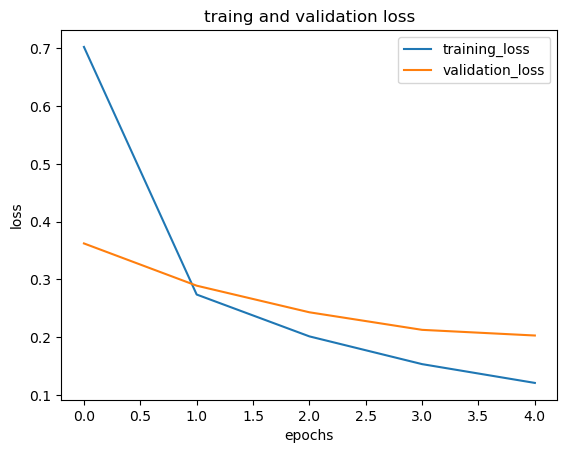

In [12]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label="training_loss")
plt.plot(history1.history['val_loss'],label="validation_loss")
plt.title("traing and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

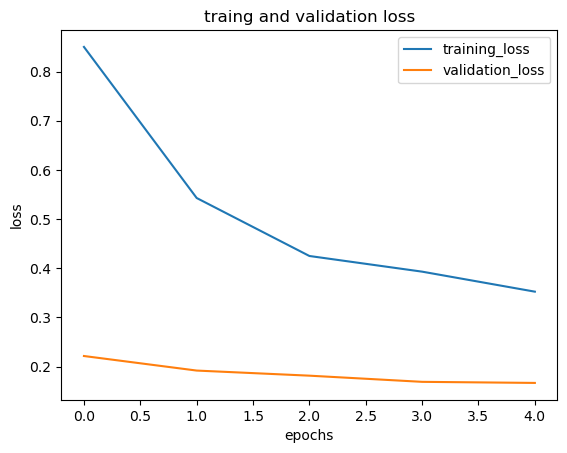

In [13]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'],label="training_loss")
plt.plot(history2.history['val_loss'],label="validation_loss")
plt.title("traing and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

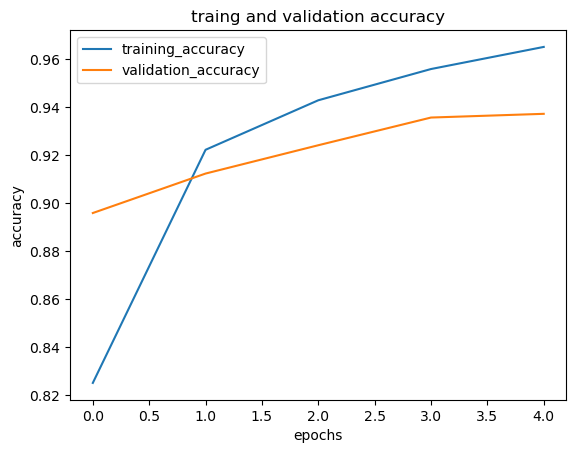

In [14]:
plt.plot(history1.history['accuracy'],label="training_accuracy")
plt.plot(history1.history['val_accuracy'],label="validation_accuracy")
plt.title("traing and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

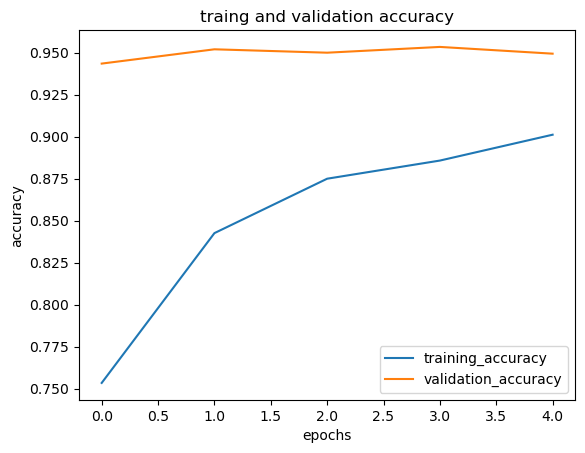

In [15]:
plt.plot(history2.history['accuracy'],label="training_accuracy")
plt.plot(history2.history['val_accuracy'],label="validation_accuracy")
plt.title("traing and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()